In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

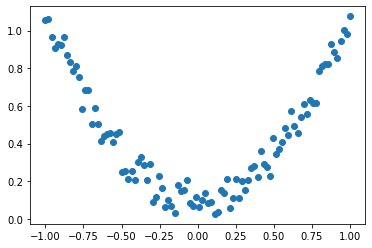

In [4]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim = 1)
y = x.pow(2)+.2*torch.rand(x.size())
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


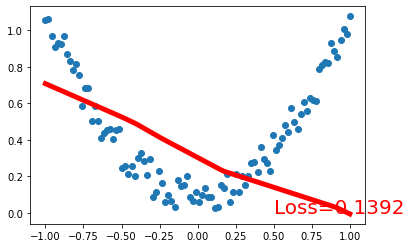

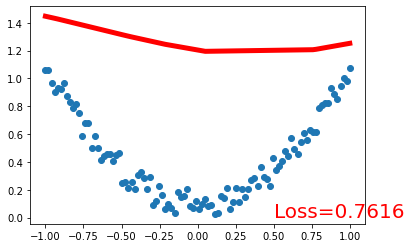

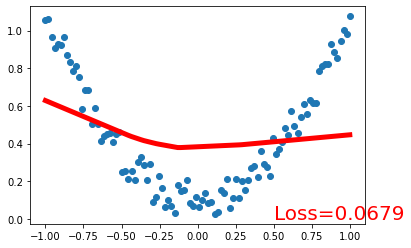

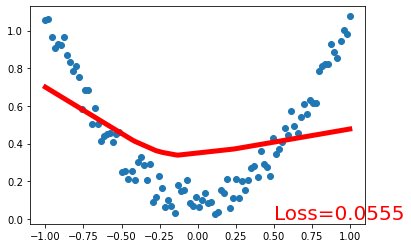

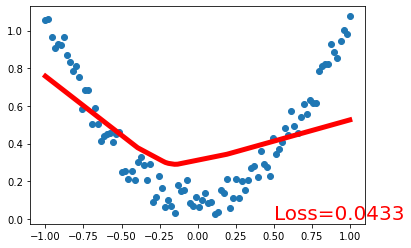

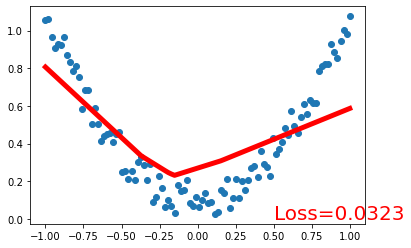

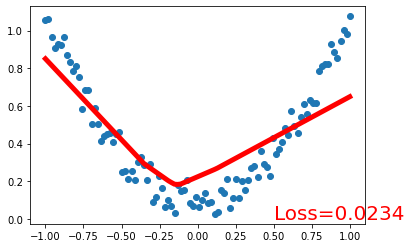

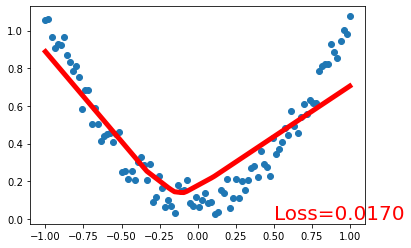

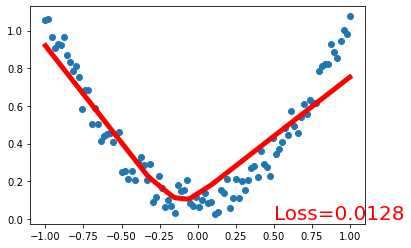

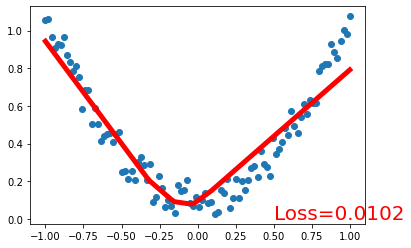

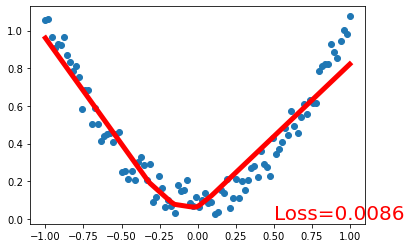

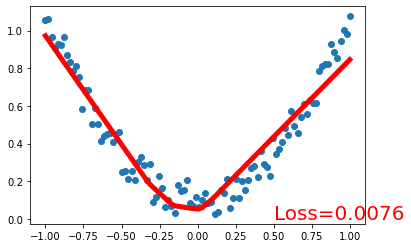

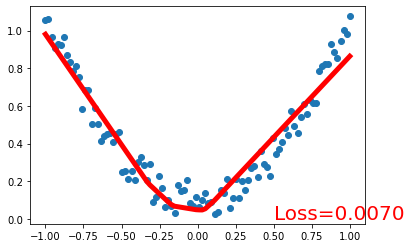

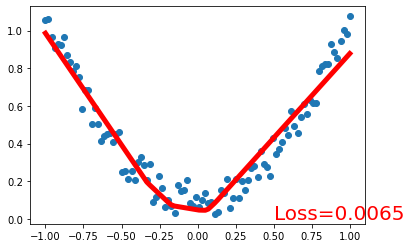

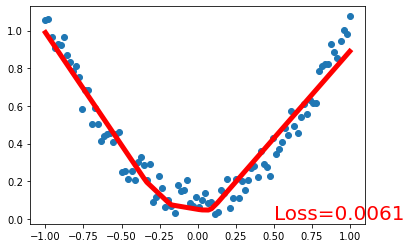

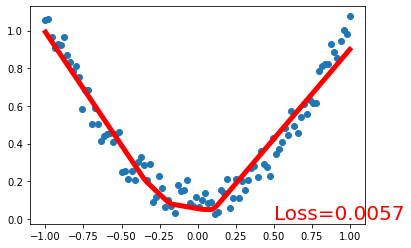

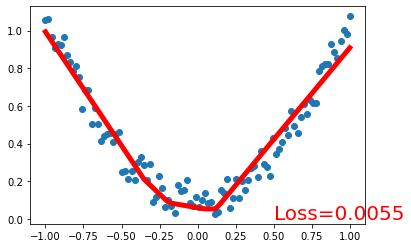

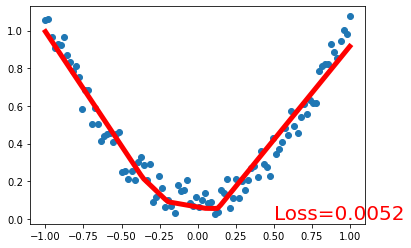

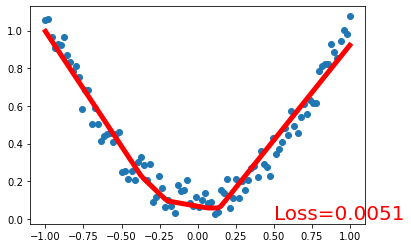

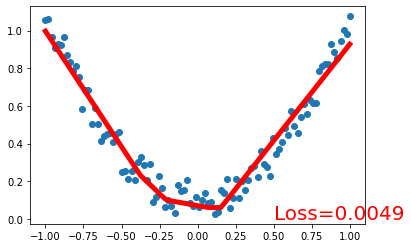

In [9]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        pass
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(1,10,1)
print(net)

plt.ion()
plt.show()
optimizer = torch.optim.SGD(net.parameters(),lr =.5)
loss_func = torch.nn.MSELoss()
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    if t%5 ==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),"r-",lw=5)
        plt.text(.5, 0 ,'Loss=%.4f' % loss.data.numpy(), fontdict={'size':20,'color':'red'})
        plt.pause(.1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
